In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 20

seed = 42

In [2]:
df = pd.read_csv("C:/Users/joean/Desktop/Data Science/Personal Projects/df_preprocessed.csv")
df

,emp_index,cust_residence,cust_gender,age,new_cust_index,cust_seniority,indrel,cust_type,cust_rel_time,cust_res_index,...,securities,home_account,payroll,pensions2,direct_debit,first_holder_date_year,first_holder_date_month,first_holder_date_day,total_accounts,dup_rows_count
0,N,Spain,H,35,0.0,6,1.0,1.0,A,1,...,0,0,0.0,0.0,0,2015,1,0,1.0,1
1,N,Spain,V,23,0.0,35,1.0,1.0,I,1,...,0,0,0.0,0.0,0,2012,8,4,1.0,1
2,N,Spain,V,23,0.0,35,1.0,1.0,I,1,...,0,0,0.0,0.0,0,2012,8,4,1.0,1
3,N,Spain,H,22,0.0,35,1.0,1.0,I,1,...,0,0,0.0,0.0,0,2012,8,4,1.0,1
4,N,Spain,V,23,0.0,35,1.0,1.0,A,1,...,0,0,0.0,0.0,0,2012,8,4,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606652,N,Spain,H,27,0.0,22,1.0,1.0,A,1,...,0,0,0.0,0.0,1,2013,9,2,0.0,1
606653,N,Spain,H,56,0.0,22,1.0,1.0,A,1,...,0,0,0.0,0.0,0,2013,9,2,1.0,1
606654,N,Spain,V,39,0.0,22,1.0,1.0,A,1,...,0,0,0.0,0.0,1,2013,9,2,1.0,1
606655,N,Spain,V,36,0.0,22,1.0,1.0,A,1,...,0,0,0.0,0.0,1,2013,9,2,1.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606657 entries, 0 to 606656
Data columns (total 45 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   emp_index                606657 non-null  object 
 1   cust_residence           606657 non-null  object 
 2   cust_gender              606657 non-null  object 
 3   age                      606657 non-null  int64  
 4   new_cust_index           606657 non-null  float64
 5   cust_seniority           606657 non-null  int64  
 6   indrel                   606657 non-null  float64
 7   cust_type                606657 non-null  float64
 8   cust_rel_time            606657 non-null  object 
 9   cust_res_index           606657 non-null  int64  
 10  is_foreign               606657 non-null  int64  
 11  channel_to_join          606657 non-null  object 
 12  deceased_index           606657 non-null  int64  
 13  name_province            606657 non-null  object 
 14  acti

In [4]:
import pickle
col_transformer = pickle.load(open('col_transformer.pkl', 'rb'))

In [5]:
df.columns

Index(['emp_index', 'cust_residence', 'cust_gender', 'age', 'new_cust_index',
       'cust_seniority', 'indrel', 'cust_type', 'cust_rel_time',
       'cust_res_index', 'is_foreign', 'channel_to_join', 'deceased_index',
       'name_province', 'activity_index', 'household_income', 'saving_acc',
       'guarantees', 'current_acc', 'derivada_acc', 'payroll_acc',
       'junior_acc', 'mass_particular_acc', 'particular_acc',
       'particular_plus_acc', 'short_term_deposit', 'medium_term_deposits',
       'long_term_deposits', 'e_account', 'funds', 'mortgage', 'pensions1',
       'loans', 'taxes', 'credit_card', 'securities', 'home_account',
       'payroll', 'pensions2', 'direct_debit', 'first_holder_date_year',
       'first_holder_date_month', 'first_holder_date_day', 'total_accounts',
       'dup_rows_count'],
      dtype='object')

# Method 1
Applying kmeans without any dimensionality reduction.the column "dup_rows_count" will be used as sample weights when fitting the model.

In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer

short_pipe = make_pipeline(
    (col_transformer), 
    (QuantileTransformer(output_distribution = "normal", random_state = seed))
)

trnsf_df = short_pipe.fit_transform(df.drop("dup_rows_count", axis = 1))
trnsf_df

array([[-0.21106976, -5.19933758, -2.87784612, ..., -5.19933758,
        -5.19933758, -5.19933758],
       [-1.02512268, -5.19933758, -0.40880512, ..., -5.19933758,
        -5.19933758, -5.19933758],
       [-1.02512268, -5.19933758, -0.40880512, ..., -5.19933758,
        -5.19933758, -5.19933758],
       ...,
       [-0.04769168, -5.19933758, -0.83555836, ..., -5.19933758,
        -5.19933758, -5.19933758],
       [-0.17527843, -5.19933758, -0.83555836, ..., -5.19933758,
        -5.19933758, -5.19933758],
       [-0.09549215, -5.19933758, -0.83555836, ..., -5.19933758,
        -5.19933758, -5.19933758]])

#### In the next sessions, we will compare different methods of identifying the optimal number of clusters. According to the problem statement, the Bank requires not more than 5 customer segments. Therefore, we will check to find the ideal number of clusters between 2 and 5. 

Wall time: 46.3 s


Text(0, 0.5, 'Intertia')

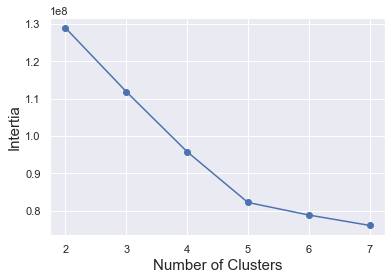

In [7]:
%%time
#Choosing number of clusters using Elbow method

from sklearn.cluster import KMeans

no_of_clusters = range(2,8) 
inertia = []

X = trnsf_df
Y = df['dup_rows_count'].values

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=seed, max_iter=1000)
    kmeans = kmeans.fit(X, sample_weight = Y)
    u = kmeans.inertia_
    inertia.append(u)
    
plt.plot(no_of_clusters, inertia, marker = "o");
plt.xlabel("Number of Clusters");
plt.ylabel("Intertia");

Elbow plot shows the inertia sharply reduces at the 5th clusters. 

Next we will check of the best clusters using metrics such as:

* ##### **Silhouette Score**: The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1 . **The best value is 1 and the worst value is -1**. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.
<br>

* ##### **Davies Bouldin Score**: The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score. **The minimum score is zero, with lower values indicating better clustering.**

([Source](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score)) 

In [9]:
%%time

#Identifying the best clus

no_of_clusters = range(2,6) 
results_ = pd.DataFrame(columns=['no_of_clusters', 'Silhouette Score','Davies Bouldin Score'])

X = trnsf_df
Y = df['dup_rows_count'].values

#Choosing the best covariance type
for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=seed, max_iter=1000)
    
    clusters = kmeans.fit_predict(X, sample_weight = Y)

    results_ = results_.append({
        "no_of_clusters" : f, 
        
        "Silhouette Score" : metrics.silhouette_score(X, 
                                                      clusters, 
                                                      sample_size = 50000, 
                                                      random_state = seed),
        
        'Davies Bouldin Score' : metrics.davies_bouldin_score(X, clusters)
    }, ignore_index=True)

results_.sort_values("Silhouette Score", ascending=False)

Wall time: 2min 53s


,no_of_clusters,Silhouette Score,Davies Bouldin Score
3,5.0,0.311950,1.391827
2,4.0,0.286112,1.567433
1,3.0,0.283206,1.707846
0,2.0,0.278324,1.521445


The model with 5 clusters also seems to show the highest Silhouette Score (SC) and lowest Davies Boulden Score (DB) with the current settings. 

Let us also visualize the Silhouette plots. 

Wall time: 4min 46s


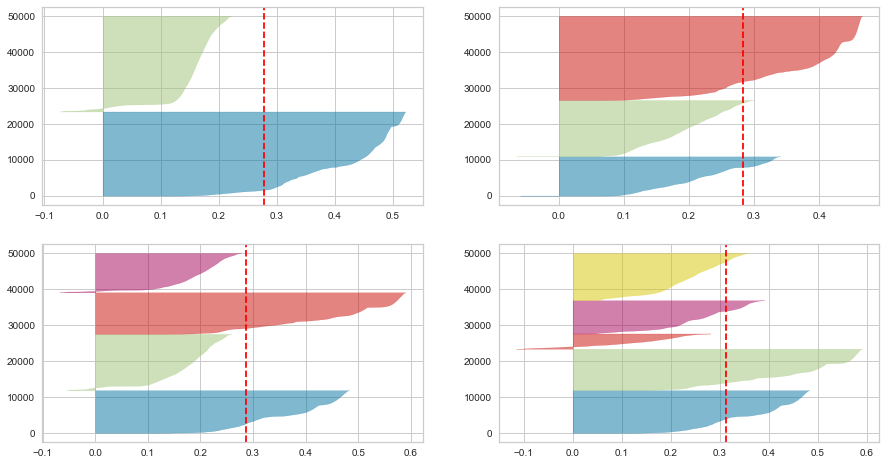

In [16]:
%%time
from yellowbrick.cluster import SilhouetteVisualizer

#We will only take a sample of the dataframe as it is computationally expensive
#to check the score on the whole dataset
X_sample = pd.DataFrame(trnsf_df).sample(n = 50000, random_state = seed).values
Y = df['dup_rows_count'].values

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for f in [2, 3, 4, 5]:

    kmeans = KMeans(n_clusters=f, random_state=seed, max_iter=1000)
    q, mod = divmod(f, 2)

    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_sample)

From the above plots, clusters 2,4 and 5 seems suboptimal since there are clusters with negative or lower Silhouette scores. Moreover, the size of each clusters are not uniform. 

Although the previous  methods shows 5 clusters as the optimal number of clusters, the above plots clearly shows that is not the case due to presence of negative silhouette scores. 

Therefore, we will choose **3 clusters**.

In [22]:
kmeans = KMeans(n_clusters=3, random_state=seed, max_iter=1000)
X = trnsf_df
Y = df['dup_rows_count'].values

noDR_kmeans_clusters = kmeans.fit_predict(X, sample_weight = Y)

In [23]:
# Now, only for data visualization purpose, we will apply PCA on the dataset and visualize the clusters.
from sklearn.decomposition import PCA

pca = PCA(n_components = 3, random_state = seed)

red_dims = pca.fit_transform(trnsf_df)

new_df = pd.DataFrame({
    "PC1" : red_dims[:,0],
    "PC2" : red_dims[:,1],
    "PC3" : red_dims[:,2]
})

new_df['noDimRed_clusters'] = noDR_kmeans_clusters

new_df

,PC1,PC2,PC3,noDimRed_clusters
0,4.693122,9.352067,-6.172906,2
1,-9.669628,-8.084483,0.092799,1
2,-9.578410,-8.124393,0.081419,1
3,-9.734131,6.040841,6.886277,1
4,6.238325,-4.896521,-6.974035,0
...,...,...,...,...
606652,8.318310,9.663925,2.830572,2
606653,4.527971,9.308131,-6.058344,2
606654,12.479102,-4.428944,6.235098,0
606655,9.675347,-4.625363,-3.349686,0


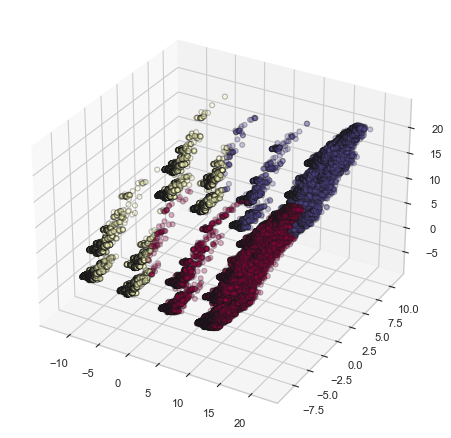

In [25]:
fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k');
ax = plt.axes(projection="3d");

sns.set()
ax.scatter3D(new_df['PC1'], new_df['PC2'], new_df['PC3'], c = new_df['noDimRed_clusters'], 
             alpha = 0.3, edgecolor = "k", cmap = 'Spectral');

I will make a list to append the scores

In [26]:
num_cust_seg = []
models = []
db_score = []
sil_coef = []

In [27]:
#checking metrics

print(f"Davies-Bouldin score: {metrics.davies_bouldin_score(trnsf_df, new_df['noDimRed_clusters']):.4f}")

print(f"""Silhouette Coeff Score: {metrics.silhouette_score(trnsf_df, 
                                                            new_df['noDimRed_clusters'], 
                                                            sample_size = 50000, 
                                                            random_state = seed):.4f}""")

Davies-Bouldin score: 1.7078
Silhouette Coeff Score: 0.2832


In [28]:
#saving the scores
num_cust_seg.append(3)

models.append("no_DimRed_kmeans")

db_score.append(metrics.davies_bouldin_score(trnsf_df, new_df['noDimRed_clusters']))

sil_coef.append(metrics.silhouette_score(trnsf_df, new_df['noDimRed_clusters'], 
                                         sample_size = 50000, random_state = seed))

#### In general,the best model will have davies_bouldin_score closer to zero and silhouette_score closer to one. Lower the  davies_bouldin_score, the better. Higher the silhouette_score, the better.

#### In the next section, we will apply dimensionality reduction to the dataset in the form of PCA and try various clustering algorithms and compare their performances.

In [29]:
#First just checking how much PC will take to have the highest explained variance ratio.

transformer = make_pipeline(
    (col_transformer), 
    (QuantileTransformer(output_distribution = "normal", random_state = seed)),
    (PCA(random_state = seed)) #not specifying number of components
)

transformer

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('onehotencoder-1',
                                  OneHotEncoder(top_categories=4,
                                                variables=['emp_index'])),
                                 ('onehotencoder-2',
                                  OneHotEncoder(variables=['cust_gender',
                                                           'cust_rel_time',
                                                           'cust_residence'])),
                                 ('countfrequencyencoder',
                                  CountFrequencyEncoder(encoding_method='frequency',
                                                        variables=['name_province',
                                                                   'channel_to_join']))])),
                ('quantiletransformer',
                 QuantileTransformer(output_distribution='normal',
                                     random_state=42)),
           

In [30]:
arr = transformer.fit_transform(df.drop(["dup_rows_count"], axis = 1))
print(arr.shape)
arr

(606657, 55)


array([[ 4.69312183e+00,  9.35206714e+00, -6.17291541e+00, ...,
         1.66963391e-15,  2.49847807e-14,  1.57859738e-13],
       [-9.66962841e+00, -8.08448286e+00,  9.28011725e-02, ...,
         1.97738488e-16,  1.74188430e-15,  3.36076062e-15],
       [-9.57840961e+00, -8.12439340e+00,  8.14187427e-02, ...,
        -3.64883544e-15, -2.79345675e-14, -5.70426461e-14],
       ...,
       [ 1.24791016e+01, -4.42894438e+00,  6.23509585e+00, ...,
        -7.89328821e-17,  2.12430784e-16, -5.50351330e-17],
       [ 9.67534715e+00, -4.62536306e+00, -3.34968628e+00, ...,
         2.01694016e-16, -2.51189936e-16,  2.92679382e-16],
       [ 6.75391679e+00,  9.69905007e+00, -3.23409992e+00, ...,
        -3.00685349e-17, -1.01457710e-16, -5.70382393e-16]])

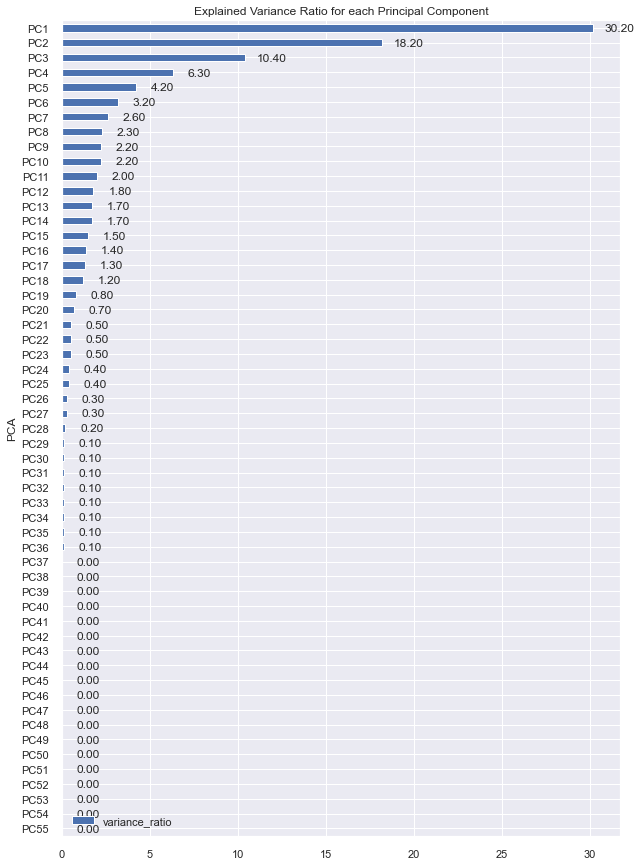

In [31]:
#plotting Principal Components and their explained variance ratio
per_var = np.round(transformer.named_steps.pca.explained_variance_ratio_ * 100, decimals = 1)
labels = ['PC' + str(x) for x in range(1,len(per_var)+1)]

pca_df = pd.DataFrame({
    "PCA" : labels,
    "variance_ratio" : per_var
}).set_index("PCA")

ax = pca_df.plot(kind = "barh", figsize = (10,15));

for p in ax.patches:
    width = p.get_width()
    plt.text(1.5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')

plt.gca().invert_yaxis();
plt.title("Explained Variance Ratio for each Principal Component");

In [32]:
np.sum(transformer.named_steps.pca.explained_variance_ratio_[:3])

0.5875891257554013

Therefore, choosing the first 3 components.

In [33]:
transformer = make_pipeline(
    (col_transformer), 
    (QuantileTransformer(output_distribution = "normal", random_state = seed)),
    (PCA(n_components = 5, random_state = seed))
)

arr = transformer.fit_transform(df.drop(["dup_rows_count"], axis = 1))

arr_with_dup_counts = transformer.fit_transform(df) #which include cup row counts as some 
                                                    #clustering algorithms dont have sample_weight option.

reduced_df = pd.DataFrame({
    "PC1" : arr[:,0],
    "PC2" : arr[:,1],
    "PC3" : arr[:,2],
})

reduced_df_with_dup = pd.DataFrame({
    "PC1" : arr_with_dup_counts[:,0],
    "PC2" : arr_with_dup_counts[:,1],
    "PC3" : arr_with_dup_counts[:,2],
})

In [34]:
reduced_df

,PC1,PC2,PC3
0,4.693122,9.352067,-6.172915
1,-9.669628,-8.084483,0.092800
2,-9.578410,-8.124393,0.081419
3,-9.734131,6.040841,6.886275
4,6.238325,-4.896522,-6.974034
...,...,...,...
606652,8.318310,9.663925,2.830572
606653,4.527971,9.308131,-6.058347
606654,12.479102,-4.428944,6.235096
606655,9.675347,-4.625363,-3.349687


In [35]:
reduced_df_with_dup

,PC1,PC2,PC3
0,4.693316,9.352094,-6.172686
1,-9.668650,-8.084998,0.093043
2,-9.577462,-8.124889,0.081624
3,-9.733258,6.040131,6.887014
4,6.183334,-4.879108,-6.994611
...,...,...,...
606652,8.318538,9.663999,2.830755
606653,4.528171,9.308151,-6.058116
606654,12.479484,-4.428624,6.234743
606655,9.675774,-4.625113,-3.349859


### Applying different clustering algorithms

## K-means

Wall time: 23.2 s


Text(0, 0.5, 'Intertia')

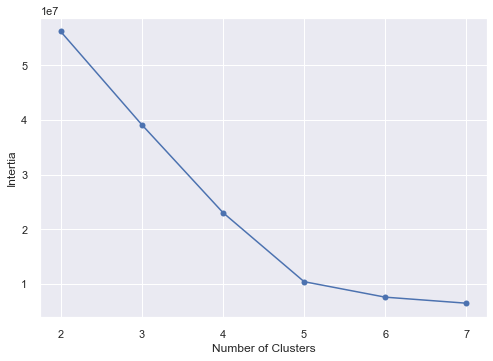

In [36]:
%%time
#Choosing number of clusters using Elbow method

from sklearn.cluster import KMeans

no_of_clusters = range(2,8) 
inertia = []

X = reduced_df[["PC1", "PC2", "PC3"]].values
# X = reduced_df[["PC1", "PC2"]].values
Y = df['dup_rows_count'].values

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=seed, max_iter=1000)
    kmeans = kmeans.fit(X, sample_weight = Y)
    u = kmeans.inertia_
    inertia.append(u)
    
plt.plot(no_of_clusters, inertia, marker = "o");
plt.xlabel("Number of Clusters");
plt.ylabel("Intertia");

In [37]:
%%time

no_of_clusters = range(2,6) 
results_ = pd.DataFrame(columns=['no_of_clusters', 'Silhouette Score','Davies Bouldin Score'])

X = reduced_df[["PC1", "PC2", "PC3"]].values
# X = reduced_df[["PC1", "PC2"]].values
Y = df['dup_rows_count'].values

#Choosing the best covariance type
for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=seed, max_iter=1000)
    
    clusters = kmeans.fit_predict(X, sample_weight = Y)

    results_ = results_.append({
        "no_of_clusters" : f, 
        
        "Silhouette Score" : metrics.silhouette_score(X, 
                                                      clusters, 
                                                      sample_size = 50000, 
                                                      random_state = seed),
        
        'Davies Bouldin Score' : metrics.davies_bouldin_score(X, clusters)
    }, ignore_index=True)

results_.sort_values("Silhouette Score", ascending=False)

Wall time: 2min 42s


,no_of_clusters,Silhouette Score,Davies Bouldin Score
3,5.0,0.717223,0.491845
2,4.0,0.651847,0.672063
1,3.0,0.528299,0.815667
0,2.0,0.480270,1.009089


Wall time: 4min 53s


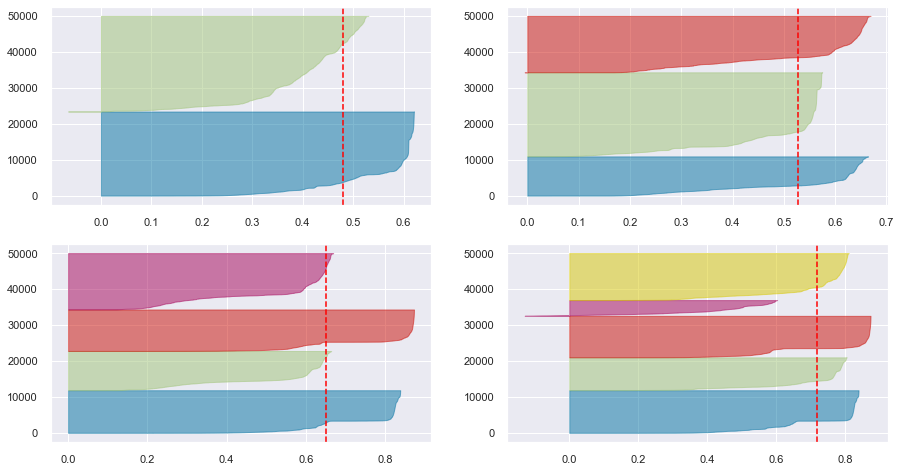

In [38]:
%%time

#We will only take a sample of the dataframe as it is computationally expensive
#to check the score on the whole dataset
X_sample = reduced_df[["PC1", "PC2", "PC3"]].sample(n = 50000, random_state = seed).values

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for f in [2, 3, 4, 5]:

    kmeans = KMeans(n_clusters=f, random_state=seed, max_iter=1000)
    q, mod = divmod(f, 2)

    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_sample)

The first 2 methods indicated that 5 clusters in optimal. Bust again, from the silhouette plot, we can see there is a cluster that has a negative silhouette score.

Both 2 and 3 cluster plots also have cluster with negative silhouette. Therefore, I choose 4 clusters as the optimal number of clusters. For the other model, I will not only utilize silhouette plots for choosing the right number of clusters.

In [39]:
%%time
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=seed, max_iter=1000)

X = reduced_df[["PC1", "PC2", "PC3"]].values
Y = df['dup_rows_count'].values

kmeans_clusters = kmeans.fit_predict(X, sample_weight = Y)

reduced_df['kmeans_clusters'] = kmeans_clusters

Wall time: 3.02 s


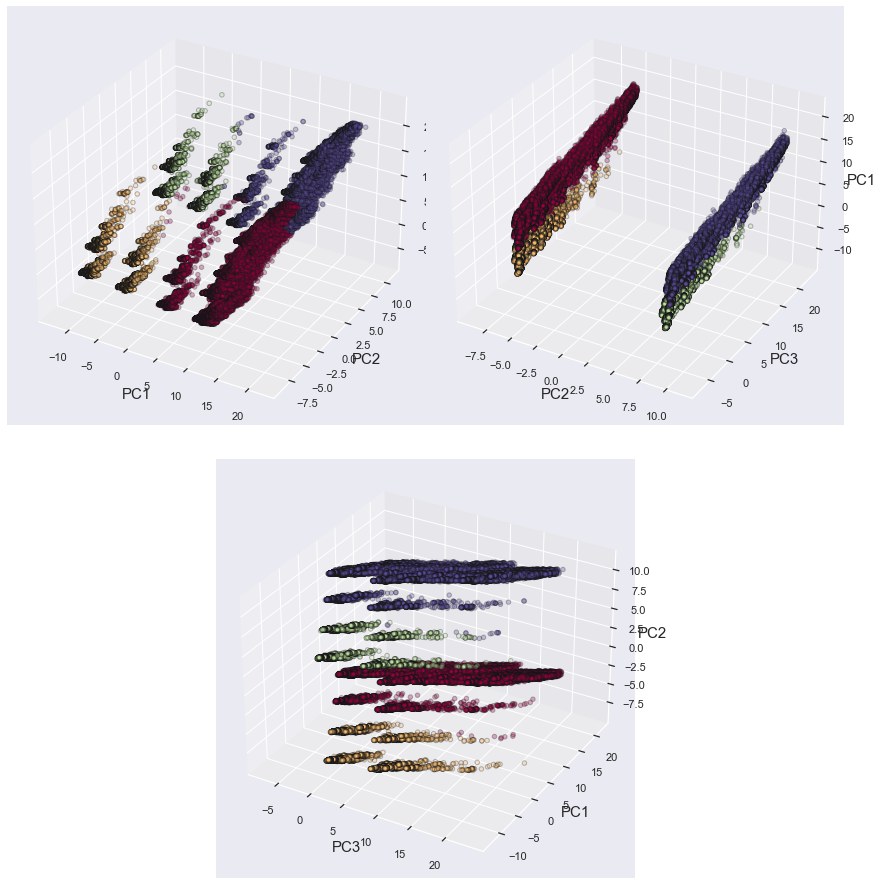

In [118]:
import matplotlib.gridspec as gridspec

#Creating a function to visualize 3d plots
def plot_3d(x,col):
    
    sns.set()
    
    fig = plt.figure(figsize=(15, 25))
    gs = gridspec.GridSpec(6, 4)

    #1st plot
    ax1 = fig.add_subplot(gs[0:2, 0:2], projection='3d')

    ax1.scatter3D(x['PC1'], x['PC2'], x['PC3'], 
                 c = x[col], alpha = 0.3, edgecolor = "k", cmap = 'Spectral');
    
    ax1.set_xlabel("PC1", fontsize = 15);
    ax1.set_ylabel("PC2", fontsize = 15);
    ax1.set_zlabel("PC3", fontsize = 15);
    
    
    #2nd plot
    ax2 = fig.add_subplot(gs[0:2,2:], projection='3d')

    ax2.scatter3D(x['PC2'], x['PC3'], x['PC1'], 
                 c = x[col], alpha = 0.3, edgecolor = "k", cmap = 'Spectral');
    
    ax2.set_xlabel("PC2", fontsize = 15);
    ax2.set_ylabel("PC3", fontsize = 15);
    ax2.set_zlabel("PC1", fontsize = 15);

    #3rd plot
    ax3 = fig.add_subplot(gs[2:4,1:3], projection='3d')

    ax3.scatter3D(x['PC3'], x['PC1'], x['PC2'], 
                 c = x[col], alpha = 0.3, edgecolor = "k", cmap = 'Spectral');
    
    ax3.set_xlabel("PC3", fontsize = 15);
    ax3.set_ylabel("PC1", fontsize = 15);
    ax3.set_zlabel("PC2", fontsize = 15);

    fig.subplots_adjust(wspace=0, hspace=0)
    plt.show()
    
    
    
#Applying the fuinction to vidualize k means clusters
plot_3d(reduced_df, 'kmeans_clusters')

The above plot seems to have well defined clusters with minimal overlap among the clusters.

In [41]:
#checking metrics

db = metrics.davies_bouldin_score(reduced_df[["PC1", "PC2", "PC3"]], reduced_df['kmeans_clusters'])

sc = metrics.silhouette_score(reduced_df[["PC1", "PC2", "PC3"]], reduced_df['kmeans_clusters'], 
                              sample_size = 50000, random_state = seed)


print(f"Davies-Bouldin score: {db:.4f}")
print(f"Silhouette Coeff Score: {sc:.4f}")

#saving the scores
num_cust_seg.append(4)
models.append("kmeans")
db_score.append(db)
sil_coef.append(sc)

Davies-Bouldin score: 0.6721
Silhouette Coeff Score: 0.6518


## MiniBatchKMeans

Wall time: 3min 40s


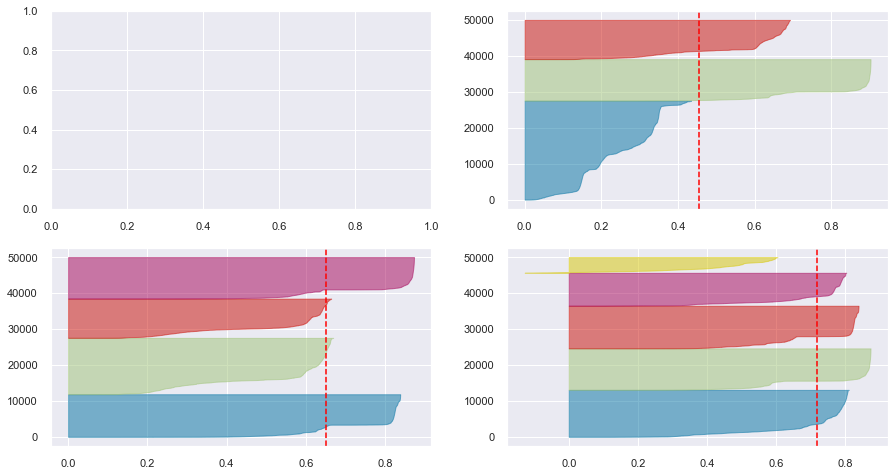

In [42]:
%%time
#Choosing number of clusters using Elbow method

from sklearn.cluster import MiniBatchKMeans

#We will only take a sample of the dataframe as it is computationally expensive
#to check the score on the whole dataset
X_sample = reduced_df[["PC1", "PC2", "PC3"]].sample(n = 50000, random_state = seed).values

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for f in [3, 4, 5]:

    mb_kmeans = MiniBatchKMeans(n_clusters=f, random_state=seed, max_iter=1000)
    q, mod = divmod(f, 2)

    visualizer = SilhouetteVisualizer(mb_kmeans, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_sample)

Choosing 4 clusters

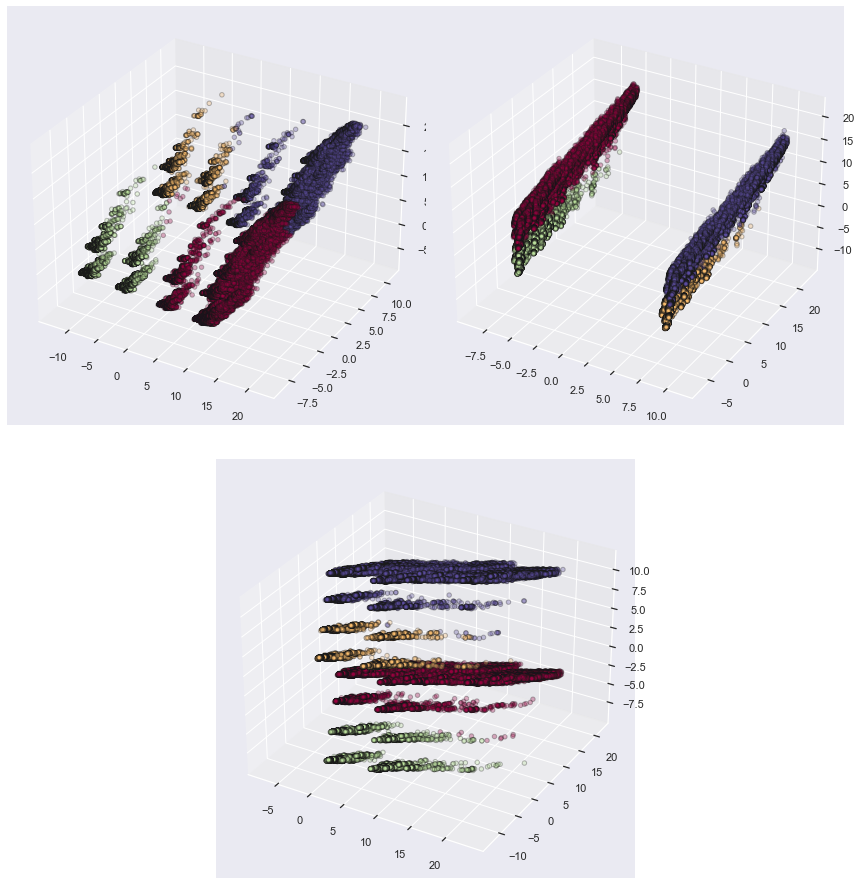

Wall time: 22.5 s


In [43]:
%%time

mb_kmeans = MiniBatchKMeans(n_clusters=4, random_state=seed, max_iter=1000)

X = reduced_df[["PC1", "PC2", "PC3"]].values
Y = df['dup_rows_count'].values

mb_kmeans_clusters =  mb_kmeans.fit_predict(X, sample_weight = Y)

reduced_df['mb_kmeans_clusters'] = mb_kmeans_clusters

plot_3d(reduced_df, 'mb_kmeans_clusters')

In [45]:
#checking metrics

db = metrics.davies_bouldin_score(reduced_df[["PC1", "PC2", "PC3"]], reduced_df['mb_kmeans_clusters'])

sc = metrics.silhouette_score(reduced_df[["PC1", "PC2", "PC3"]], reduced_df['mb_kmeans_clusters'], 
                              sample_size = 50000, random_state = seed)


print(f"Davies-Bouldin score: {db:.4f}")
print(f"Silhouette Coeff Score: {sc:.4f}")

#saving the scores
num_cust_seg.append(4)
models.append("mini_batch_kmeans")
db_score.append(db)
sil_coef.append(sc)

Davies-Bouldin score: 0.6721
Silhouette Coeff Score: 0.6518


## GMM Algorithm

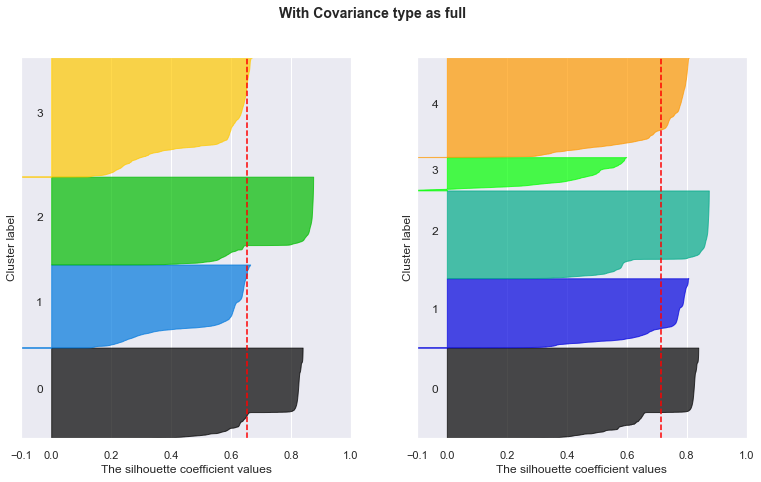

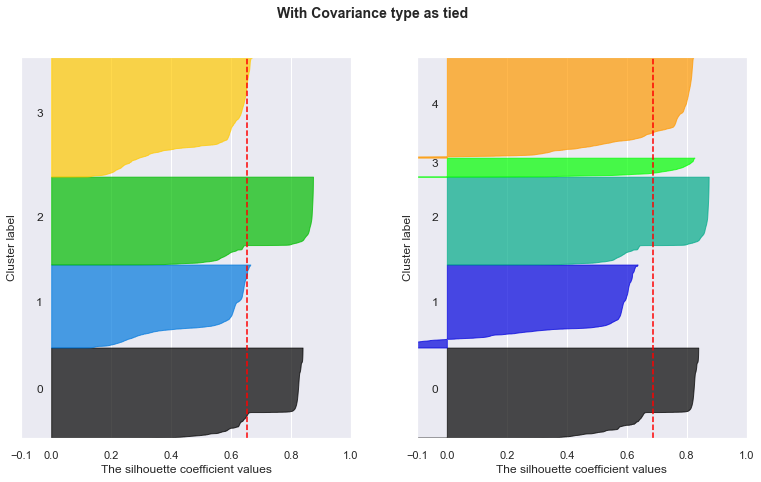

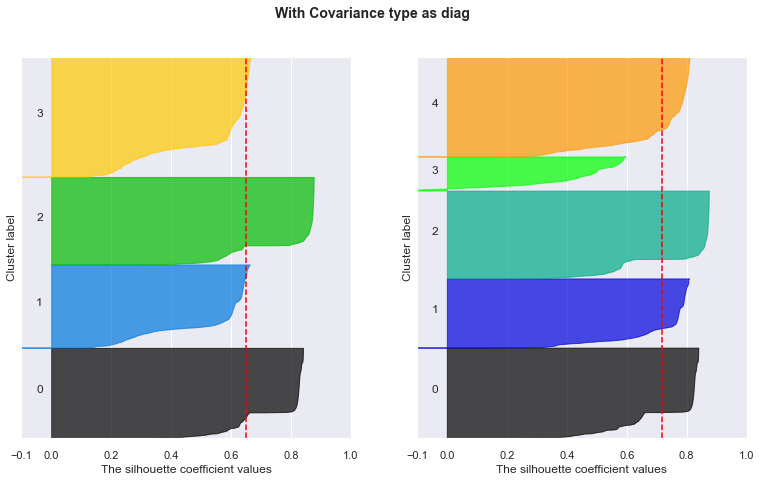

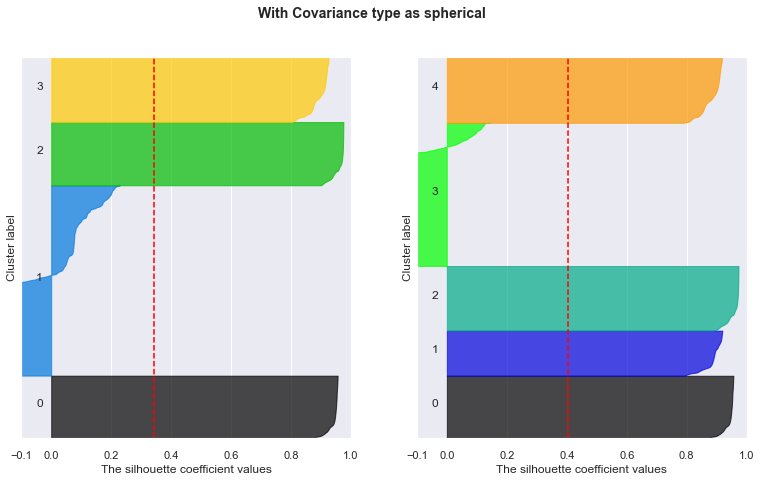

Wall time: 27min 11s
Parser   : 139 ms


In [121]:
%%time
import matplotlib.cm as cm
from sklearn.mixture import GaussianMixture

X_sample = reduced_df_with_dup[["PC1", "PC2", "PC3"]].sample(n = 50000, random_state = seed).values

parameters=['full','tied','diag','spherical']

for param in parameters:
    
    fig, axes = plt.subplots(1, 2, figsize = (13,7))

    for n_clusters, ax in zip([4, 5], axes.flatten()):

        ax.set_xlim([-0.1, 1])

        ax.set_ylim([0, len(X_sample) + (n_clusters + 1) * 10])

        clusterer = GaussianMixture(n_components = n_clusters, covariance_type = param, 
                                    random_state = seed,  max_iter = 1000)

        cluster_labels = clusterer.fit_predict(X_sample)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = metrics.silhouette_samples(X_sample, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):

            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            silhouette_avg = metrics.silhouette_score(X_sample, cluster_labels)

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax.set_xlabel("The silhouette coefficient values")
        ax.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax.set_yticks([])  # Clear the yaxis labels / ticks
        ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        
        plt.suptitle((f"With Covariance type as {param}"),
                 fontsize=14, fontweight='bold')

    plt.show()

Gaussian mixture model having 4 clusters with covariance type as "tied" will be used.

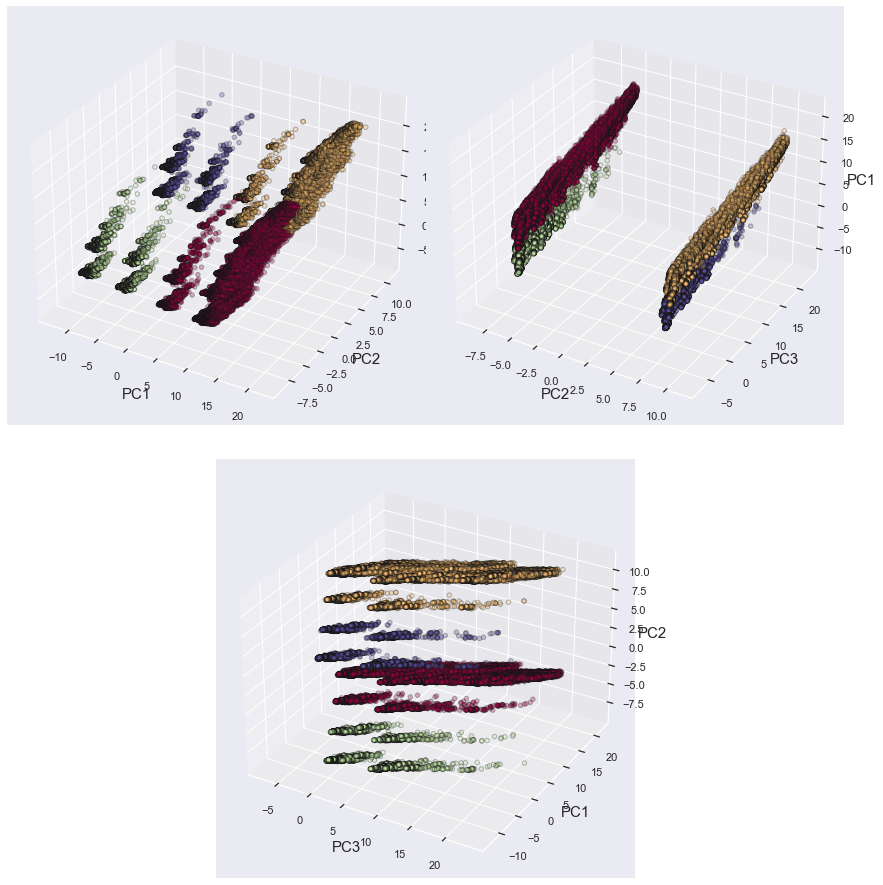

Wall time: 29.3 s
Parser   : 464 ms


In [122]:
%%time
from sklearn.cluster import Birch

X_with_dup = reduced_df_with_dup[["PC1", "PC2", "PC3"]].values

gauss_mixture = GaussianMixture(n_components = 4, covariance_type = "tied", 
                                    random_state = seed,  max_iter = 1000)

gauss_mixture_clusters = gauss_mixture.fit_predict(X_with_dup)

reduced_df_with_dup['gauss_mixture_clusters'] = gauss_mixture_clusters

plot_3d(reduced_df_with_dup, 'gauss_mixture_clusters')

The above plot shows well distinct clusters that does not seem to overlap with other clusters. SO far this is the best clustering algorithm for this dataset.

In [123]:
#checking metrics

db = metrics.davies_bouldin_score(reduced_df_with_dup[["PC1", "PC2", "PC3"]], 
                                  reduced_df_with_dup['gauss_mixture_clusters'])

sc = metrics.silhouette_score(reduced_df_with_dup[["PC1", "PC2", "PC3"]], 
                              reduced_df_with_dup['gauss_mixture_clusters'], 
                              sample_size = 50000, 
                              random_state = seed)


print(f"Davies-Bouldin score: {db:.4f}")
print(f"Silhouette Coeff Score: {sc:.4f}")

#saving the scores
num_cust_seg.append(4)
models.append("GaussianMixture")
db_score.append(db)
sil_coef.append(sc)

Davies-Bouldin score: 0.6720
Silhouette Coeff Score: 0.6518


## fuzzy c means

Wall time: 15min 27s


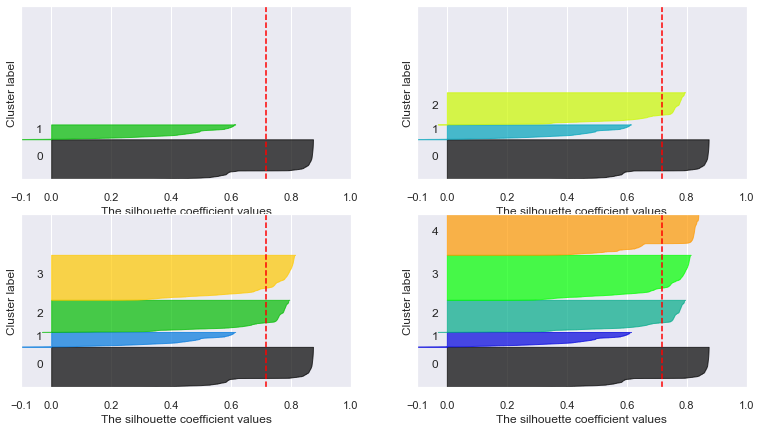

In [127]:
%%time

from fcmeans import FCM

X_sample = reduced_df_with_dup[["PC1", "PC2", "PC3"]].sample(n = 50000, random_state = seed).values

fig, axes = plt.subplots(2, 2, figsize = (13,7))

for n_clusters, ax in zip([2, 3, 4, 5], axes.flatten()):
    
    ax.set_xlim([-0.1, 1])

    ax.set_ylim([0, len(X_sample) + (n_clusters + 1) * 10])

    clusterer = FCM(n_clusters = f, random_state = seed, max_iter = 1000)
    
    clusterer.fit(X_sample)
    
    cluster_labels = clusterer.predict(X_sample)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = metrics.silhouette_samples(X_sample, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):

        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        silhouette_avg = metrics.silhouette_score(X_sample, cluster_labels)

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

Fuzzy c means will be left out

# Birch

Wall time: 6min 49s


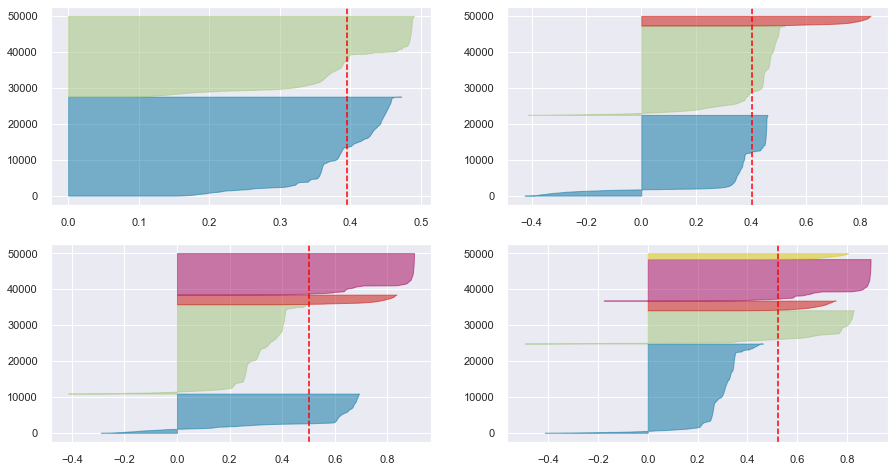

In [113]:
%%time
from sklearn.cluster import Birch

#We will only take a sample of the dataframe as it is computationally expensive
#to check the score on the whole dataset
X_sample = reduced_df[["PC1", "PC2", "PC3"]].sample(n = 50000, random_state = seed).values

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for f in [2, 3, 4, 5]:

    birch = Birch(n_clusters=f, threshold=1.0)
    q, mod = divmod(f, 2)

    visualizer = SilhouetteVisualizer(birch, colors='yellowbrick', force_model = True, ax=ax[q-1][mod])
    visualizer.fit(X_sample)

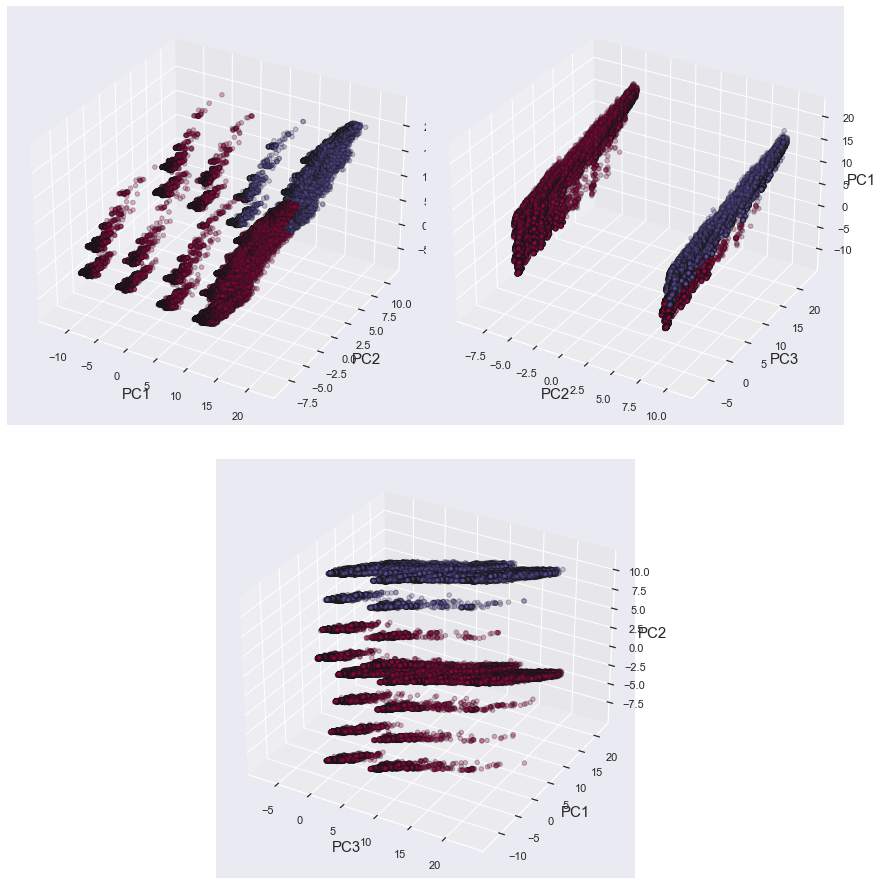

Wall time: 40.5 s


In [120]:
%%time
from sklearn.cluster import Birch

X_with_dup = reduced_df_with_dup[["PC1", "PC2", "PC3"]].values

birch = Birch(n_clusters=2, threshold=1.0)

birch_clusters = birch.fit_predict(X_with_dup)

reduced_df_with_dup['birch_clusters'] = birch_clusters

plot_3d(reduced_df_with_dup, 'birch_clusters')

In [128]:
#checking metrics

db = metrics.davies_bouldin_score(reduced_df_with_dup[["PC1", "PC2", "PC3"]], 
                                  reduced_df_with_dup['birch_clusters'])

sc = metrics.silhouette_score(reduced_df_with_dup[["PC1", "PC2", "PC3"]], 
                              reduced_df_with_dup['birch_clusters'], 
                              sample_size = 50000, 
                              random_state = seed)


print(f"Davies-Bouldin score: {db:.4f}")
print(f"Silhouette Coeff Score: {sc:.4f}")

#saving the scores
num_cust_seg.append(2)
models.append("Birch")
db_score.append(db)
sil_coef.append(sc)

Davies-Bouldin score: 1.2169
Silhouette Coeff Score: 0.3135


# Comparison of clustering models

In [129]:
models

['no_DimRed_kmeans', 'kmeans', 'mini_batch_kmeans', 'GaussianMixture', 'Birch']

In [130]:
score_df = pd.DataFrame({
    "Customer Segments" : num_cust_seg,
    "models" : models,
    "Davies-Bouldin_Score" : db_score,
    "Silhouette_Coeff_Score" : sil_coef
})

score_df.sort_values("Silhouette_Coeff_Score", ascending = False)

,Customer Segments,models,Davies-Bouldin_Score,Silhouette_Coeff_Score
1,4,kmeans,0.672063,0.651847
2,4,mini_batch_kmeans,0.672079,0.651847
3,4,GaussianMixture,0.672017,0.651808
4,2,Birch,1.216883,0.313497
0,3,no_DimRed_kmeans,1.707846,0.283206


In [131]:
score_df.sort_values("Davies-Bouldin_Score")

,Customer Segments,models,Davies-Bouldin_Score,Silhouette_Coeff_Score
3,4,GaussianMixture,0.672017,0.651808
1,4,kmeans,0.672063,0.651847
2,4,mini_batch_kmeans,0.672079,0.651847
4,2,Birch,1.216883,0.313497
0,3,no_DimRed_kmeans,1.707846,0.283206


#### From the above results, although kmeans has slightly higher silhouette score, Gaussian Mixture model has a better Davies Bouldin score and has a better visualization compared to all other models. Hence we choose **Gaussian Mixture** model with **4 clusters**.

In [137]:
reduced_df_with_dup['gauss_mixture_clusters']

0         1
1         2
2         2
3         3
4         0
         ..
606652    1
606653    1
606654    0
606655    0
606656    1
Name: gauss_mixture_clusters, Length: 606657, dtype: int64

In [138]:
df['customer_segments'] = reduced_df_with_dup['gauss_mixture_clusters']
df

,emp_index,cust_residence,cust_gender,age,new_cust_index,cust_seniority,indrel,cust_type,cust_rel_time,cust_res_index,...,home_account,payroll,pensions2,direct_debit,first_holder_date_year,first_holder_date_month,first_holder_date_day,total_accounts,dup_rows_count,customer_segments
0,N,Spain,H,35,0.0,6,1.0,1.0,A,1,...,0,0.0,0.0,0,2015,1,0,1.0,1,1
1,N,Spain,V,23,0.0,35,1.0,1.0,I,1,...,0,0.0,0.0,0,2012,8,4,1.0,1,2
2,N,Spain,V,23,0.0,35,1.0,1.0,I,1,...,0,0.0,0.0,0,2012,8,4,1.0,1,2
3,N,Spain,H,22,0.0,35,1.0,1.0,I,1,...,0,0.0,0.0,0,2012,8,4,1.0,1,3
4,N,Spain,V,23,0.0,35,1.0,1.0,A,1,...,0,0.0,0.0,0,2012,8,4,1.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606652,N,Spain,H,27,0.0,22,1.0,1.0,A,1,...,0,0.0,0.0,1,2013,9,2,0.0,1,1
606653,N,Spain,H,56,0.0,22,1.0,1.0,A,1,...,0,0.0,0.0,0,2013,9,2,1.0,1,1
606654,N,Spain,V,39,0.0,22,1.0,1.0,A,1,...,0,0.0,0.0,1,2013,9,2,1.0,1,0
606655,N,Spain,V,36,0.0,22,1.0,1.0,A,1,...,0,0.0,0.0,1,2013,9,2,1.0,1,0


In [139]:
df.to_csv("df_with_clusters.csv", index = False)

In the next session, we will analyze each customer segments.